<a href="https://colab.research.google.com/github/Teganmosi/Steak-or-pizza-detection/blob/main/steak_or_pizza_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip # Unzip the downloaded filezip_ref = zipfile.ZipFile("pizza_steak.zip", "r")zip_ref.extractall()
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-06-13 23:16:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.128, 74.125.199.128, 142.250.99.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   147MB/s    in 0.7s    

2023-06-13 23:16:33 (147 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:

!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/test/

pizza  steak


In [ ]:
!ls pizza_steak/test/steak/

100274.jpg   1653815.jpg  2307638.jpg  2944161.jpg  3622237.jpg  638678.jpg
1012080.jpg  1655387.jpg  2308682.jpg  2945937.jpg  365725.jpg	 640024.jpg
1016217.jpg  1662212.jpg  2315011.jpg  296375.jpg   3662612.jpg  647683.jpg
1064847.jpg  168551.jpg   2339231.jpg  2981911.jpg  367422.jpg	 653303.jpg
1082384.jpg  1687010.jpg  2353677.jpg  2984679.jpg  3681340.jpg  66183.jpg
108310.jpg   1718949.jpg  2365038.jpg  2989645.jpg  3753767.jpg  66207.jpg
1094883.jpg  1778186.jpg  2372048.jpg  3013185.jpg  3757027.jpg  66858.jpg
1107549.jpg  1792128.jpg  2382600.jpg  3013404.jpg  378397.jpg	 670345.jpg
1118585.jpg  1794566.jpg  2416973.jpg  3029602.jpg  3786535.jpg  673127.jpg
1163050.jpg  1848046.jpg  2475366.jpg  3048920.jpg  3835895.jpg  690177.jpg
1166047.jpg  1848936.jpg  2484823.jpg  3060047.jpg  3842125.jpg  690477.jpg
1190808.jpg  1868005.jpg  2510026.jpg  3062369.jpg  3873283.jpg  697562.jpg
1194662.jpg  1872368.jpg  2512387.jpg  3063435.jpg  3873655.jpg  7056.jpg
1206166.jpg  1874088

In [ ]:

import os


# A way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
#To get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img



Image shape: (384, 512, 3)


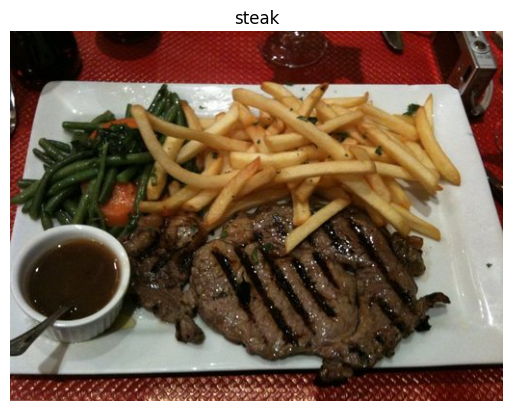

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [ ]:
img


array([[[  9,   5,   2],
        [  6,   2,   0],
        [  5,   1,   0],
        ...,
        [156, 156, 128],
        [145, 145, 119],
        [152, 152, 128]],

       [[  9,   5,   2],
        [  8,   4,   1],
        [  8,   4,   1],
        ...,
        [148, 144, 117],
        [140, 136, 111],
        [150, 144, 122]],

       [[  8,   4,   1],
        [ 10,   6,   3],
        [ 10,   6,   3],
        ...,
        [141, 131, 106],
        [142, 129, 110],
        [151, 135, 119]],

       ...,

       [[112,  42,  32],
        [ 95,  25,  17],
        [108,  40,  31],
        ...,
        [126,  59,  43],
        [130,  63,  46],
        [105,  38,  21]],

       [[135,  65,  57],
        [116,  48,  39],
        [122,  55,  46],
        ...,
        [ 95,  28,  11],
        [ 99,  32,  15],
        [ 93,  26,   9]],

       [[154,  86,  77],
        [155,  88,  79],
        [142,  78,  69],
        ...,
        [ 89,  24,   6],
        [ 70,   5,   0],
        [ 90,  25,   7]]

In [ ]:
# View the image shape
img.shape # returns (width, height, colour channels)

(384, 512, 3)

In [ ]:
# Get all the pixel values between 0 & 1
img/255

array([[[0.03529412, 0.01960784, 0.00784314],
        [0.02352941, 0.00784314, 0.        ],
        [0.01960784, 0.00392157, 0.        ],
        ...,
        [0.61176471, 0.61176471, 0.50196078],
        [0.56862745, 0.56862745, 0.46666667],
        [0.59607843, 0.59607843, 0.50196078]],

       [[0.03529412, 0.01960784, 0.00784314],
        [0.03137255, 0.01568627, 0.00392157],
        [0.03137255, 0.01568627, 0.00392157],
        ...,
        [0.58039216, 0.56470588, 0.45882353],
        [0.54901961, 0.53333333, 0.43529412],
        [0.58823529, 0.56470588, 0.47843137]],

       [[0.03137255, 0.01568627, 0.00392157],
        [0.03921569, 0.02352941, 0.01176471],
        [0.03921569, 0.02352941, 0.01176471],
        ...,
        [0.55294118, 0.51372549, 0.41568627],
        [0.55686275, 0.50588235, 0.43137255],
        [0.59215686, 0.52941176, 0.46666667]],

       ...,

       [[0.43921569, 0.16470588, 0.1254902 ],
        [0.37254902, 0.09803922, 0.06666667],
        [0.42352941, 0

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 20s 395ms/step - loss: 0.6286 - accuracy: 0.6300 - val_loss: 0.4672 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4655 - accuracy: 0.7940 - val_loss: 0.3991 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 11s 224ms/step - loss: 0.4272 - accuracy: 0.8113 - val_loss: 0.4768 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 11s 235ms/step - loss: 0.3909 - accuracy: 0.8367 - val_loss: 0.3598 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 10s 222ms/step - loss: 0.2790 - accuracy: 0.8900 - val_loss: 0.4136 - val_accuracy: 0.8120


In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])



model_2.compile(loss = 'binary_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
            epochs = 5,
            steps_per_epoch = len(train_data),
            validation_data= valid_data,
            validation_steps = len(valid_data) )


Epoch 1/5
47/47 [==============================] - 11s 213ms/step - loss: 0.8423 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 150528)            0         
                                                                 
 dense_9 (Dense)             (None, 4)                 602116    
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),

])

model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 219ms/step - loss: 2.9744 - accuracy: 0.6447 - val_loss: 0.5078 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.9115 - accuracy: 0.6787 - val_loss: 0.5700 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.8638 - accuracy: 0.7027 - val_loss: 1.6213 - val_accuracy: 0.5660
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.5462 - accuracy: 0.7727 - val_loss: 0.5761 - val_accuracy: 0.7120
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.5378 - accuracy: 0.7453 - val_loss: 0.4895 - val_accuracy: 0.7820


In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 150528)            0         
                                                                 
 dense_12 (Dense)            (None, 100)               15052900  
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (512, 289, 3)


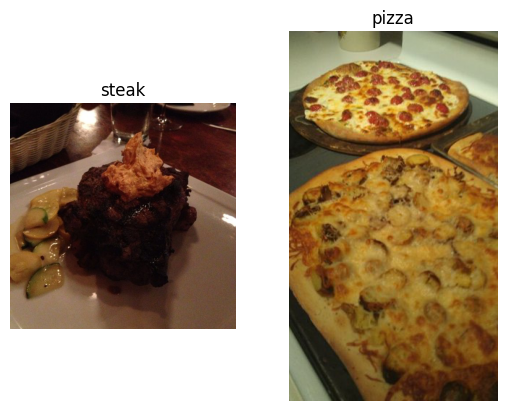

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/225.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                  target_size = (224,224),
                                  class_mode = 'binary',
                                  batch_size = 32)

test_data = test_datagen.flow_from_directory(directory = train_dir,
                                  target_size = (224,224),
                                  class_mode = 'binary',
                                  batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
images[:2], images[0].shape

(array([[[[0.14222223, 0.07555556, 0.05333333],
          [0.14666668, 0.08      , 0.05777778],
          [0.15111111, 0.07111111, 0.06222222],
          ...,
          [0.75555557, 0.43111113, 0.27555555],
          [0.52000004, 0.22666667, 0.08444445],
          [0.48444447, 0.20888889, 0.        ]],
 
         [[0.13777778, 0.07111111, 0.04      ],
          [0.15111111, 0.08444445, 0.05333333],
          [0.13777778, 0.07111111, 0.04888889],
          ...,
          [0.7066667 , 0.3866667 , 0.20888889],
          [0.51111114, 0.21777779, 0.06666667],
          [0.6       , 0.33333334, 0.11111111]],
 
         [[0.14666668, 0.08444445, 0.04444445],
          [0.15111111, 0.08888889, 0.04888889],
          [0.13333334, 0.06666667, 0.03555556],
          ...,
          [0.5822222 , 0.27555555, 0.08888889],
          [0.53333336, 0.2488889 , 0.08      ],
          [0.6666667 , 0.4088889 , 0.20444445]],
 
         ...,
 
         [[0.4888889 , 0.35555556, 0.19555557],
          [0.48444

In [ ]:
labels

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.],
      dtype=float32)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters = 10,
           kernel_size = 3,
           strides = 1,
           padding = 'valid',
           activation = 'relu',
           input_shape = (224,224,3)),
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10,3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [ ]:

model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [ ]:
len(train_data), len(test_data)

(47, 47)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 16s 349ms/step - loss: 2.7116e-04 - accuracy: 1.0000 - val_loss: 9.5462e-04 - val_accuracy: 1.0000
Epoch 2/5
47/47 [==============================] - 15s 325ms/step - loss: 2.3018e-04 - accuracy: 1.0000 - val_loss: 6.1463e-04 - val_accuracy: 1.0000
Epoch 3/5
47/47 [==============================] - 16s 347ms/step - loss: 1.9933e-04 - accuracy: 1.0000 - val_loss: 5.4278e-04 - val_accuracy: 1.0000
Epoch 4/5
47/47 [==============================] - 15s 323ms/step - loss: 1.7384e-04 - accuracy: 1.0000 - val_loss: 5.0934e-04 - val_accuracy: 1.0000
Epoch 5/5
47/47 [==============================] - 15s 322ms/step - loss: 1.4934e-04 - accuracy: 1.0000 - val_loss: 5.2536e-04 - val_accuracy: 1.0000


In [ ]:
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 18s 315ms/step - loss: 0.6274 - accuracy: 0.6440 - val_loss: 0.5140 - val_accuracy: 0.7693
Epoch 2/5
47/47 [==============================] - 18s 390ms/step - loss: 0.4625 - accuracy: 0.7913 - val_loss: 0.4256 - val_accuracy: 0.8133
Epoch 3/5
47/47 [==============================] - 15s 314ms/step - loss: 0.4312 - accuracy: 0.8220 - val_loss: 0.3988 - val_accuracy: 0.8193
Epoch 4/5
47/47 [==============================] - 14s 311ms/step - loss: 0.3986 - accuracy: 0.8267 - val_loss: 0.3743 - val_accuracy: 0.8453
Epoch 5/5
47/47 [==============================] - 18s 391ms/step - loss: 0.3840 - accuracy: 0.8307 - val_loss: 0.3685 - val_accuracy: 0.8527


In [ ]:
model_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 10)      

In [ ]:

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

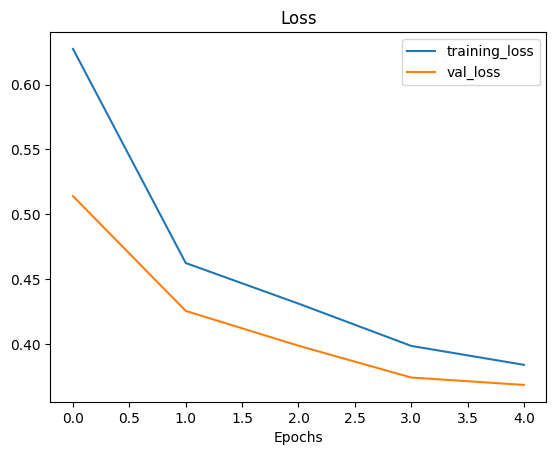

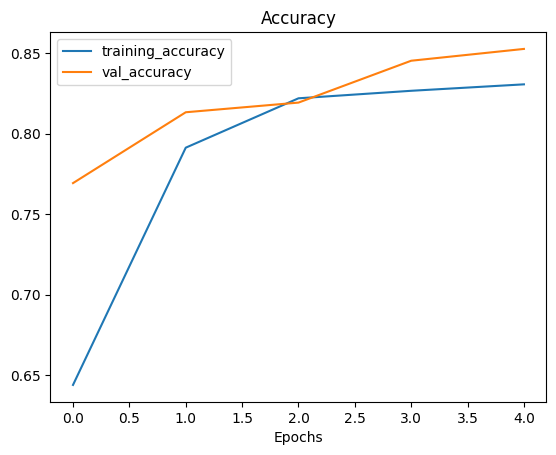

In [ ]:
plot_loss_curves(history_5)

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same



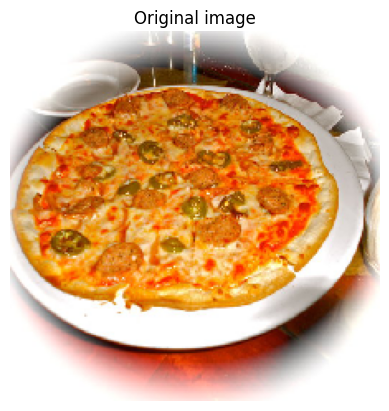

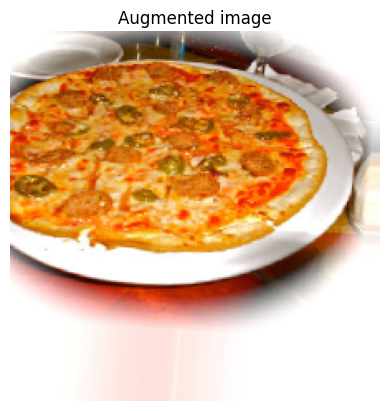

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 26s 512ms/step - loss: 0.7015 - accuracy: 0.4913 - val_loss: 0.6705 - val_accuracy: 0.7160
Epoch 2/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6992 - accuracy: 0.5353 - val_loss: 0.6649 - val_accuracy: 0.5540
Epoch 3/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6850 - accuracy: 0.5707 - val_loss: 0.6379 - val_accuracy: 0.6220
Epoch 4/5
47/47 [==============================] - 26s 554ms/step - loss: 0.6491 - accuracy: 0.6053 - val_loss: 0.5859 - val_accuracy: 0.6700
Epoch 5/5
47/47 [==============================] - 24s 511ms/step - loss: 0.6570 - accuracy: 0.6273 - val_loss: 0.6140 - val_accuracy: 0.7440


In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuf

Found 1500 images belonging to 2 classes.


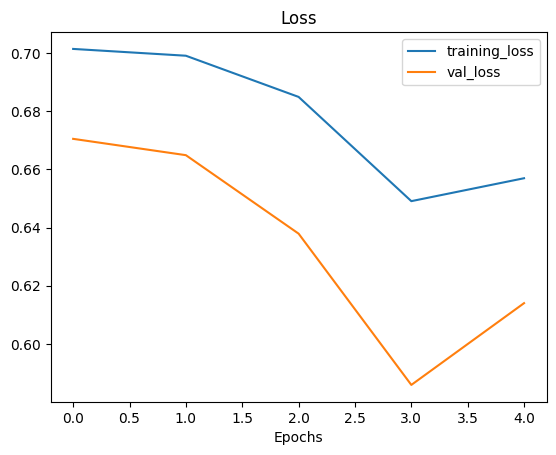

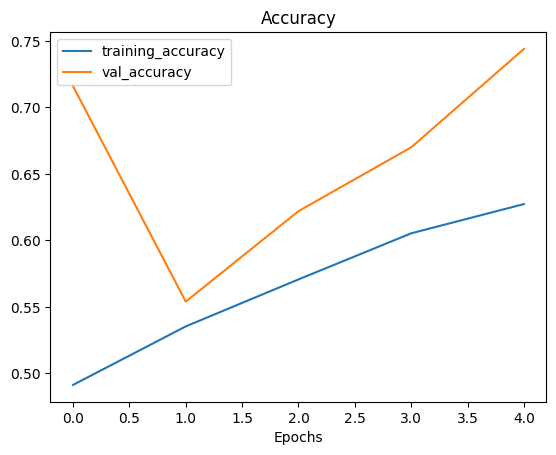

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)


In [ ]:
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 512ms/step - loss: 0.6634 - accuracy: 0.5813 - val_loss: 0.6377 - val_accuracy: 0.6120
Epoch 2/5
47/47 [==============================] - 25s 526ms/step - loss: 0.5906 - accuracy: 0.6860 - val_loss: 0.4925 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 24s 507ms/step - loss: 0.5184 - accuracy: 0.7473 - val_loss: 0.3537 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 25s 516ms/step - loss: 0.4676 - accuracy: 0.7807 - val_loss: 0.3501 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 24s 503ms/step - loss: 0.4585 - accuracy: 0.7887 - val_loss: 0.3098 - val_accuracy: 0.8700


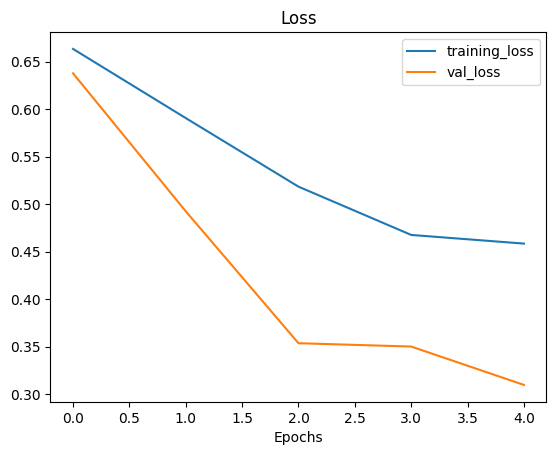

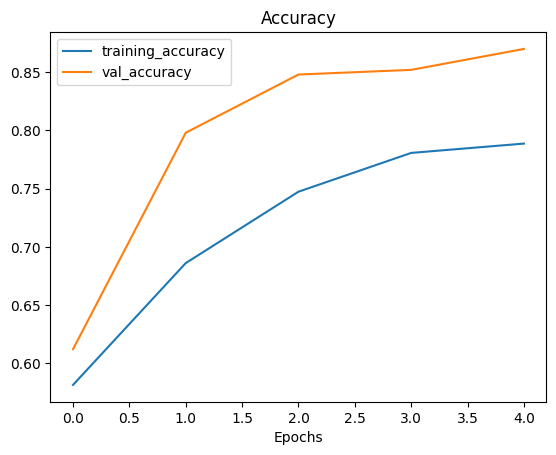

In [ ]:
# Check model's performance history training on augmented data
plot_loss_curves(history_7)

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 538ms/step - loss: 0.6246 - accuracy: 0.6300 - val_loss: 0.4434 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 28s 597ms/step - loss: 0.5209 - accuracy: 0.7540 - val_loss: 0.5153 - val_accuracy: 0.7300
Epoch 3/5
47/47 [==============================] - 27s 573ms/step - loss: 0.4903 - accuracy: 0.7747 - val_loss: 0.3348 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 25s 535ms/step - loss: 0.4809 - accuracy: 0.7827 - val_loss: 0.3518 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 27s 586ms/step - loss: 0.4681 - accuracy: 0.7860 - val_loss: 0.3284 - val_accuracy: 0.8560


In [ ]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [ ]:
model_8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_33 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_35 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                

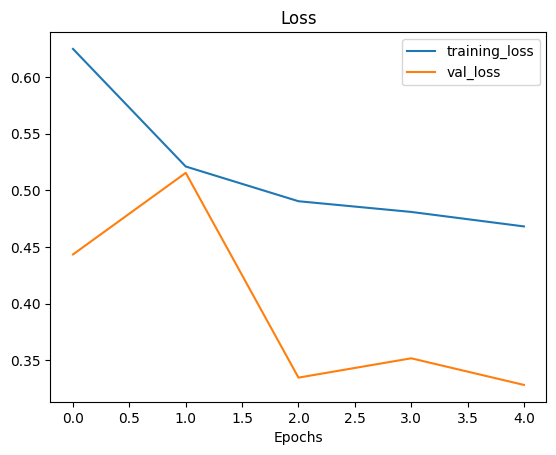

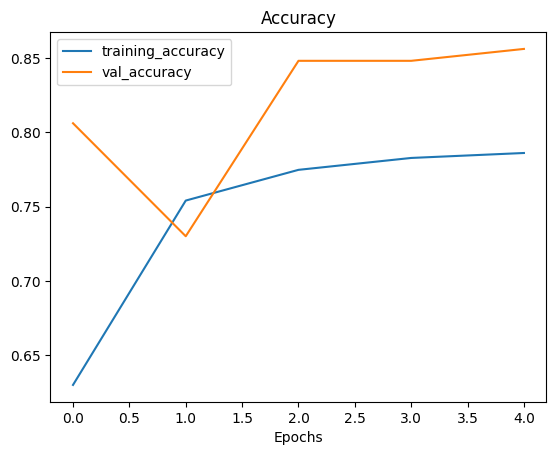

In [ ]:
plot_loss_curves(history_8)

In [ ]:

# Classes we're working with
print(class_names)

['pizza' 'steak']


--2023-06-14 01:57:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.03s   

2023-06-14 01:57:15 (57.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



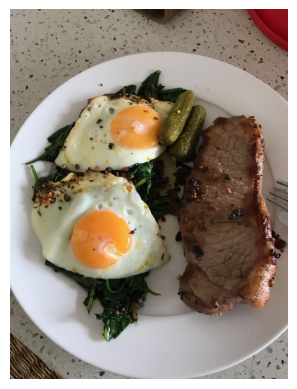

In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);


In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 192ms/step


array([[0.920778]], dtype=float32)

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


1/1 [==============================] - 0s 22ms/step


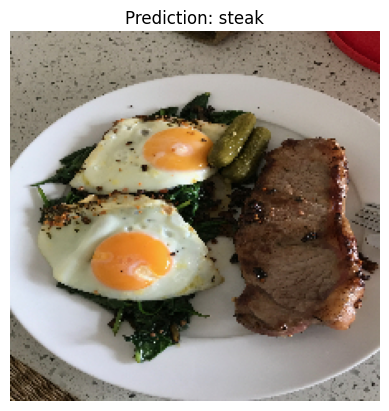

In [ ]:

# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

--2023-06-14 02:04:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-06-14 02:04:09 (52.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 86ms/step


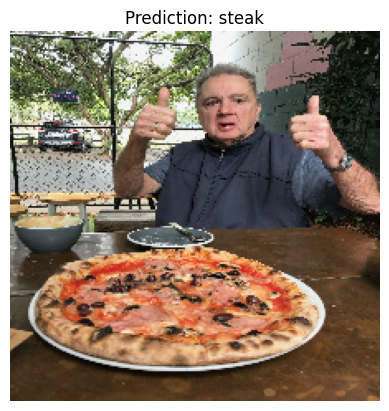

In [ ]:
# Download another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)